# Exercise 1: Detecting a signal in noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import uuid

## 1. Plots of signal plus noise

Write a function for the plots. The files were created form the command line with generate_source.

In [2]:
def plotfunction(datafile, s, f, a):
    X, Y = np.loadtxt(datafile, delimiter=' ', unpack=True)
    plt.plot(X, Y)
    plt.title(f'File {datafile} with s = {s}, f = {f}, a = {a}')
    plt.xlabel('$t$')
    plt.ylabel('$d(t)$')
    plt.show()

### Try several standard deviations

s = 1.0,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

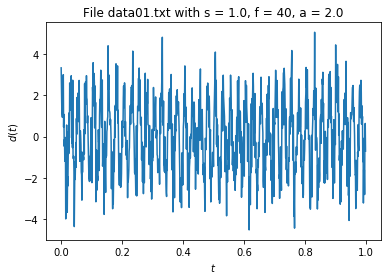

In [3]:
plotfunction('data01.txt', s=1.0, f=40, a=2.0)

s = 0.5,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

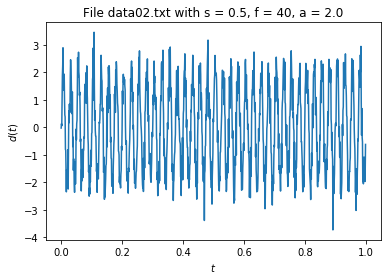

In [4]:
plotfunction('data02.txt', s=0.5, f=40, a=2.0)

s = 0.0,
d = 0.001,
N = 1000,
f = 40,
p = 0.0,
a = 2.0,
r = 0:

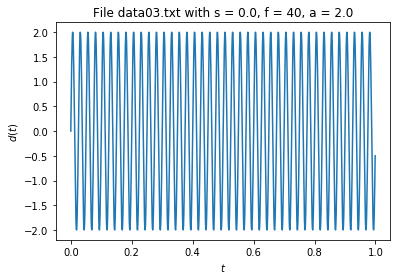

In [5]:
plotfunction('data03.txt', s=0.0, f=40, a=2.0)

### Different frequency

s = 1.0,
d = 0.001,
N = 1000,
f = 60,
p = 0.0,
a = 2.0,
r = 0:

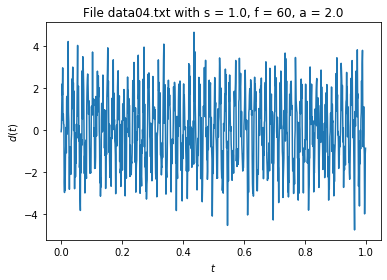

In [6]:
plotfunction('data04.txt', s=1.0, f=60, a=2.0)

### Different amplitudes

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 1.0, r = 0:

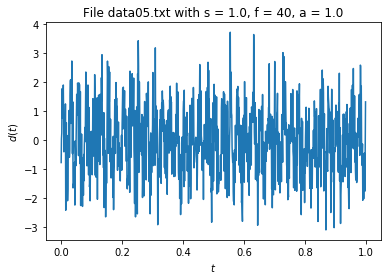

In [7]:
plotfunction('data05.txt', s=1.0, f=40, a=1.0)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.5, r = 0:

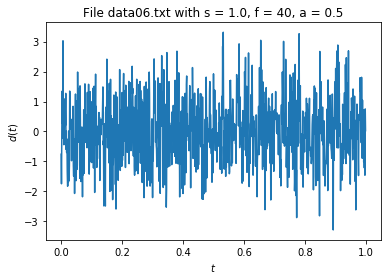

In [8]:
plotfunction('data06.txt', s=1.0, f=40, a=0.5)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.3, r = 0:

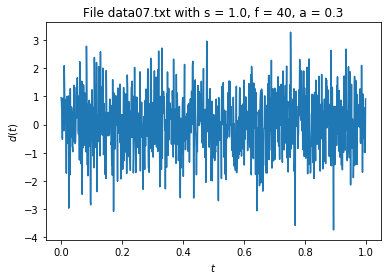

In [9]:
plotfunction('data07.txt', s=1.0, f=40, a=0.3)

s = 1.0, d = 0.001, N = 1000, f = 40, p = 0.0, a = 0.1, r = 0:

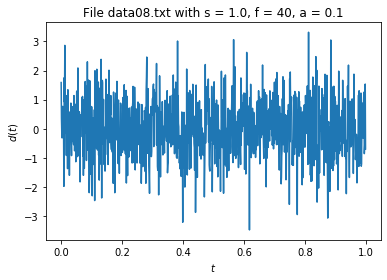

In [10]:
plotfunction('data08.txt', s=1.0, f=40, a=0.1)

## 2. Use the program prober

help for using the executable:

paths:

In [11]:
base_cmd = "" # can be empty for local use
exe_dir = "c:/Users/janhe/datalab/code/" # directory where the executable is found
output_dir = "c:/Users/janhe/datalab/solutions/exercise1" # directory to save the data file
data_dir = "../../Codes/data" # directory for jupyter to find the data in

A function calling the prober-executable, similar to the solution discussed during the lab:

In [12]:
def prober(i, f, p, m, o=None, t=None):
    if o == None:
        o = "results_" + str(uuid.uuid4()) + ".csv"
    
    #path of the executable:
    exe_path = os.path.join(exe_dir, 'prober')
    
    #command line: "{base_cmd} " taken out before "{exe_path}"
    cmd_str = f"{exe_path} -i {output_dir}/{i} "\
        f"-o {output_dir}/{o} -m {m}"
    
    if t:
        cmd_str += f" -t {output_dir}/{t} "
    else:
        cmd_str += f" -f {f} -p {p}"
    
    # Optionally print the command line and test it outside the notebook
    print(cmd_str)
    
    cmd = cmd_str.split(' ')
    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)
    out, err = process.communicate()
    if err:
        print('The process raised an error:', err.decode())
    if out:
        print('The process has an output:', out.decode())
    if os.path.isfile(o):
        print(f"Output generated in file {o}")

    return os.path.join(data_dir, o)

Unfortunately, an error occurs when using this function ("not a valid Win32 application"). My assumption is that this is because I used the Windows Subsystem for Linux (with Ubuntu) for compiling the code of the programs generate_source and prober. Therefore, the executables seem to be no exe-files. However, this function here seems to need an exe-file because it is run on Windows. But I do not know how to fix this problem. And I did not manage to compile the programs in a different way because the installation of argtable2, which was still necessary for that, did not work there for me.

In [13]:
prober("data01.txt", f=10, p=0, m=1)

c:/Users/janhe/datalab/code/prober -i c:/Users/janhe/datalab/solutions/exercise1/data01.txt -o c:/Users/janhe/datalab/solutions/exercise1/results_813dd511-35a6-48f7-9181-52d1dca99960.csv -m 1 -f 10 -p 0


OSError: [WinError 193] %1 ist keine zulässige Win32-Anwendung

## 3. Vary the parameters of an injected signal, probe the same parameter point

See the screenshot "exercise1task3" for methods 1 and 2, and the files "analysisdata01m3" and "analysisdata05m3" for method 3.

Create template bank file (maybe you need to change the path):

In [14]:
f_list = np.linspace(0.25,100.0,400)

In [15]:
with open('C:/Users/janhe/datalab/code/valuesforfandphi.txt','w') as file:
    for f in f_list:
        file.write("{0} {1}\n".format(f,0))

In [16]:
# Make a "template-bank" with a single template. 
with open('C:/Users/janhe/datalab/code/tb.dat','w') as tbfile:
     tbfile.write("40 0\n")

The files "analysisdata01m3" and "analysisdata05m3" were created with "tb.dat" (i.e. f=40, p=0).

./prober -i data01.txt -o analysisdata01m3.dat -t tb.dat -m 3

./prober -i data05.txt -o analysisdata05m3.dat -t tb.dat -m 3

In [17]:
data = np.loadtxt("analysisdata01m3.dat")
print("Result for data01.txt (amplitude a=2) using method 3:")
a = np.max(data[:,2])
b = np.sum(data[:,2])
print(f"max: {a}")
print(f"sum: {b}")
print(f"difference: {b-a}")

data = np.loadtxt("analysisdata05m3.dat")
print("Result for data05.txt (amplitude a=1) using method 3:")
a = np.max(data[:,2])
b = np.sum(data[:,2])
print(f"max: {a}")
print(f"sum: {b}")
print(f"difference: {b-a}")

Result for data01.txt (amplitude a=2) using method 3:
max: 1017310.0
sum: 1523123.9704000002
difference: 505813.9704000002
Result for data05.txt (amplitude a=1) using method 3:
max: 228572.0
sum: 708613.325423
difference: 480041.32542300003


## 4. Plots of results

See the files of the form "screenshotdata01m1.png", where a wide range of frequencies was used for prober from the command line. The results are saved in files of the form "analysisdata01m1.txt"

In [18]:
def newplotfunction(datafile, m):
    results = np.loadtxt(datafile)
    #X, Y = np.loadtxt(datafile, delimiter=' ', unpack=True)
    plt.plot(results[:,0],results[:,2])
    plt.title(f'File {datafile}')
    plt.xlabel('$f$')
    #plt.ylabel('$d(t)$')
    plt.show()
    # S_2 searching for a minimum:
    if m == 2:
        best = np.where(results[:,2] == np.min(results[:,2]))
        print("Minimum at f = {0:.3f}".format(results[:,0][best][0]))
    else:
        best = np.where(results[:,2] == np.max(results[:,2]))
        print("Maximum at f = {0:.3f}".format(results[:,0][best][0]))
    print("It is {0:.3f}".format(results[:,2][best][0]))

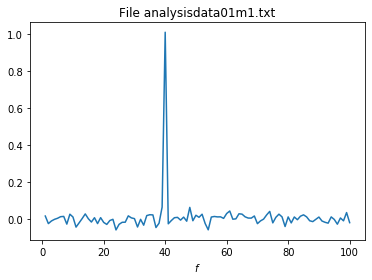

Maximum at f = 40.000
It is 1.008


In [19]:
newplotfunction("analysisdata01m1.txt",1)

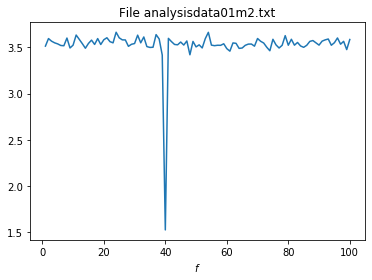

Minimum at f = 40.000
It is 1.527


In [20]:
newplotfunction("analysisdata01m2.txt",2)

Now test this for weaker signals, i.e. smaller amplitudes:

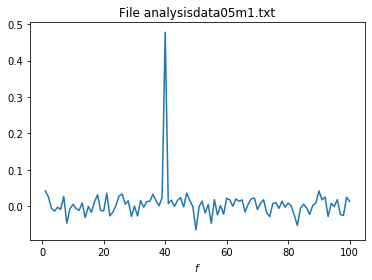

Maximum at f = 40.000
It is 0.478


In [21]:
newplotfunction("analysisdata05m1.txt",1)

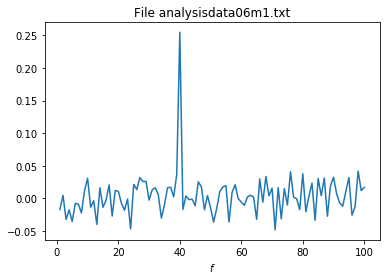

Maximum at f = 40.000
It is 0.255


In [22]:
newplotfunction("analysisdata06m1.txt",1)

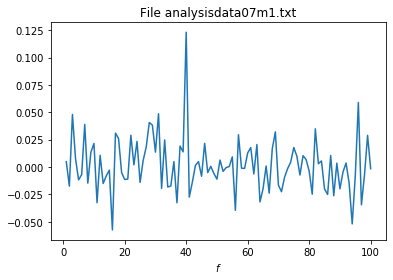

Maximum at f = 40.000
It is 0.123


In [23]:
newplotfunction("analysisdata07m1.txt",1)

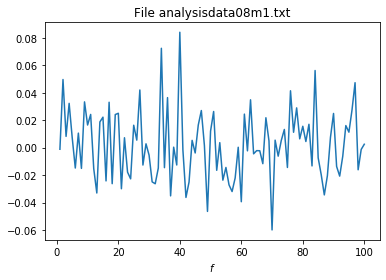

Maximum at f = 40.000
It is 0.084


In [24]:
newplotfunction("analysisdata08m1.txt",1)

Plot the files arising from using method 3:

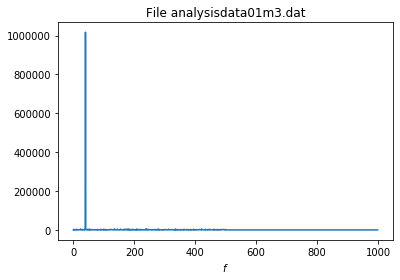

Maximum at f = 40.000
It is 1017310.000


In [25]:
newplotfunction("analysisdata01m3.dat",3)

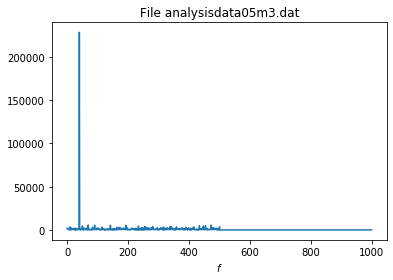

Maximum at f = 40.000
It is 228572.000


In [26]:
newplotfunction("analysisdata05m3.dat",3)

When the amplitude gets smaller, the peak is less high.

## 5. Strategy

Use prober for a wide range of frequencies and find peaks.